<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/Ago25-26/Tarea_agosto_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')
data=np.loadtxt("/content/drive/MyDrive/Colab Notebooks/olympic100m_men.txt",delimiter = ',').T
x=data[0]
y=data[1]

Mounted at /content/drive


In [4]:
def W(x,y,o=1):
  X=np.ones((o+1,len(x)),dtype=float)
  for i in range(o+1):
    for j in range(len(x)):
      X[i][j]=x[j]**i
  X=X.T
  #w=np.linalg.inv(X.T @ X) @ (X.T @ y)
  w=np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T, y))
  # y de prediccion con w
  y_pred = X @ w
  #Valor de error medio
  mse = np.mean((y_pred - y)**2)
  return w,mse

def fun(x,w):
  y=0.0
  for i in range(0,len(w)):
    y += w[i]*x**i
  return y

In [5]:
x

array([1896., 1900., 1904., 1906., 1908., 1912., 1920., 1924., 1928.,
       1932., 1936., 1948., 1952., 1956., 1960., 1964., 1968., 1972.,
       1976., 1980., 1984., 1988., 1992., 1996., 2000., 2004., 2008.])

In [6]:
# normalizando
x = (x - 1892) / 4
x

array([ 1. ,  2. ,  3. ,  3.5,  4. ,  5. ,  7. ,  8. ,  9. , 10. , 11. ,
       14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 23. , 24. ,
       25. , 26. , 27. , 28. , 29. ])

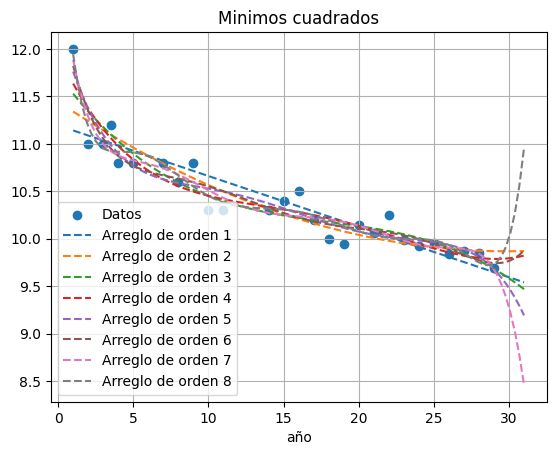

In [13]:
# Dominio
x1=np.linspace(np.min(x),np.max(x)+2,100)

#Grafico
plt.scatter(x,y,label='Datos')
for i in range(1,9):
  plt.plot(x1,fun(x1,W(x,y,i)[0]),'--',label='Arreglo de orden '+str(i))

plt.grid()
plt.xlabel('año')
plt.ylabel('')
plt.title('Minimos cuadrados')
plt.legend()

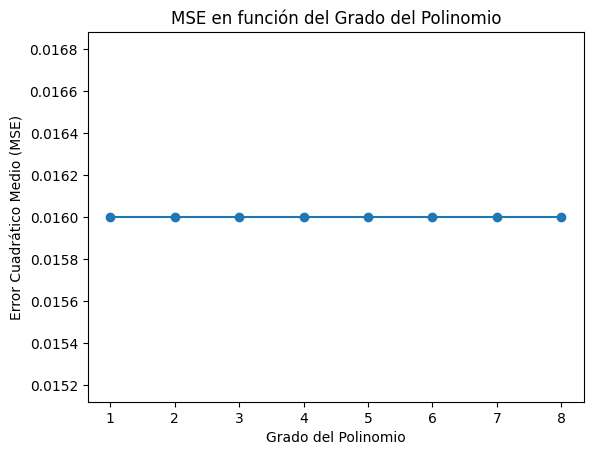

In [14]:
mse_values = []

for i in range(1, 9):     #9 por grado 8
    w, mse = W(x[:20], y[:20], 8)       # mse Error Cuadrático Medio
    mse_values.append(mse)
# Graficar el MSE en función del grado del polinomio
plt.plot(range(1, 9), mse_values, marker='o')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('MSE en función del Grado del Polinomio')
plt.show()

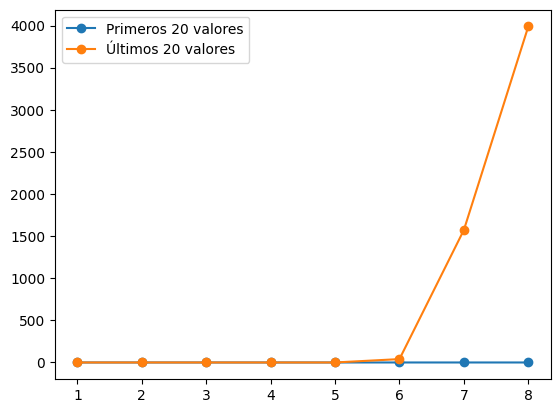

In [15]:
#
mse_train_values = []
for grado in range(1, 9):
    w_train, mse_train = W(x[:20], y[:20], grado)
    mse_train_values.append(mse_train)

#
mse_val_values = []
for grado in range(1, 9):
    w_val, mse_val = W(x[20:], y[20:], grado)
    mse_val_values.append(mse_val)

#
plt.plot(range(1,9), mse_train_values, marker='o', label='Primeros 20 valores')
plt.plot(range(1, 9), mse_val_values, marker='o', label='Últimos 20 valores')
plt.legend()
plt.show()

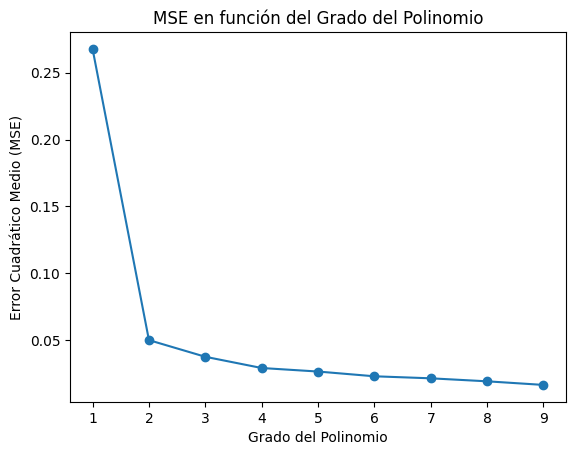

In [20]:
mse_cross_array= []
for grado in range(9):
    mse_v = 0.0
    for i in range(len(x)):
        x_cross = np.delete(x, i)
        y_cross = np.delete(y, i)
        w_cross, mse_cross = W(x_cross, y_cross, grado)
        mse_v += mse_cross
    mse_cross_array.append(mse_v / len(x))


plt.plot(range(1, len(mse_cross_array)+1), mse_cross_array, marker='o')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('MSE en función del Grado del Polinomio')
plt.show()


In [18]:
mse_cross_array

[0.26769586894586905,
 0.05008853199827841,
 0.03764446515846907,
 0.02925264887278518,
 0.026614772064934313,
 0.02306695213295266,
 0.02155018584895961,
 0.019305305361551485,
 0.016612694037416734]

Valor de x en el mínimo: 13.997469752446783
Valor mínimo de la derivada: -0.06813808064558813


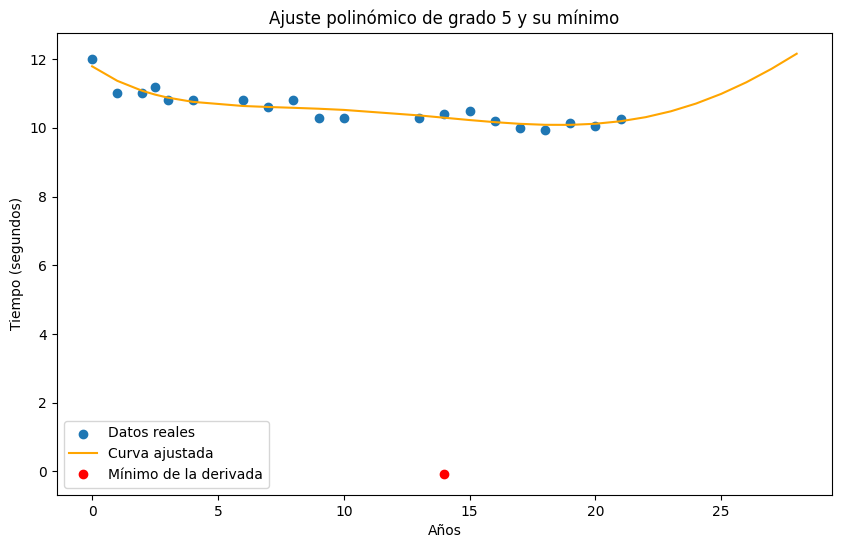

In [59]:
from scipy.optimize import minimize_scalar

def y_derivada(x, w):
    derivada = np.zeros_like(x)
    for i in range(len(w)):
        derivada += i * w[i] * x**(i - 1)
    return derivada
x = data[0]
y = data[1]
x = (x - 1896) / 4

grado = 5

w_test, costo = W(x[:20], y[:20], grado)

def curva_derivada(x, w):
    derivada = np.zeros_like(x)
    for i in range(1, len(w)):
        derivada += i * w[i] * x**(i - 1)
    return derivada

func_minimizar = lambda x: curva_derivada(x, w_test)
resultado = minimize_scalar(func_minimizar, bounds=(np.min(x), np.max(x)))
x_minimo = resultado.x
valor_minimo = resultado.fun

print(f"Valor de x en el mínimo: {x_minimo}")
print(f"Valor mínimo de la derivada: {valor_minimo}")

curva_ajustada = np.zeros_like(x)
for i in range(len(w_test)):
    curva_ajustada += w_test[i] * x**i

plt.figure(figsize=(10, 6))
plt.scatter(x[:20], y[:20], label='Datos reales')
plt.plot(x, curva_ajustada, label='Curva ajustada', color='orange')
plt.plot(x_minimo, valor_minimo, 'ro', label='Mínimo de la derivada')
plt.xlabel('Años')
plt.ylabel('Tiempo (segundos)')
plt.legend()
plt.title(f'Ajuste polinómico de grado {grado} y su mínimo')
plt.show()